# Fase 1. Preparaión de Datos

### Input: Dataset Original 

#### Descripcion de Dataset

- Este conjunto de datos consta de reseñas de alimentos, cuando con aproximadamente 51716 reseñas. Las reseñas incluyen un comentario hacerca del lugar y un valor de sentimiento. 


#### Contenido

- DatasetSentimientos.xlsx

#### Número de Variables

- El dataset cuenta con 2 variables

#### Columnas 
1.   **comentario**: Input, comentario completo realizado sobre comida, restuanrate, bar, ambiente, etc
2.   **Sentimiento**: 0 es que no le gusto el establecimiento y 1 que si le gusto

#### Número de instancias: 

- para el procesamiento se trabajara con 200 registros, el dataset cuenta con 51716, en los 200 registros 100 contendran comentarios positivos y los otros 100 seran de negativos

### Importación de Librerias 

In [1]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
##Libreria para corregir faltas ortograficas
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle

### Carga del dataset

In [4]:
def cargaDataSet(nombreArchivo):
    ## Para texto o dataset en español, descomentar el codigo
    ##df = pd.read_csv(nombreArchivo, low_memory=False, encoding= 'latin-1', sep=';')
    file_name = nombreArchivo # File name
    sheet_name = 0 # 4th sheet
    header = 0 # The header is the 2nd row
    df = pd.read_excel('Dataset-Reviews/DatasetSentimientos.xlsx', sheet_name = sheet_name, header = header, engine='openpyxl')
    print(df.shape)
    return df

In [5]:
dataset = cargaDataSet('Dataset-Reviews/DatasetSentimientos.xlsx')
dataset.head(7)

(51716, 2)


,comentario,sentimiento
0,"Ruido infernal, poca luz y muy rica comida. De...",1
1,"Muy buen ambiente, buena música. La atención e...",1
2,"¡Tan bueno como siempre! Después de 15 años, v...",1
3,Me encanta este lugar. Pizza muy finita y riqu...,1
4,Un clásico! Soy habitué desde los 90,1
5,Simplemente genial! Histórico... voy desde que...,1
6,este restaurant es LO MAS ...... desde su dueñ...,1


### Limpieza de Datos 

#### Verificación y Eliminación re filas con valores nulos 

- El dataset no cuenta con columnas vacias 

In [6]:
def eliminarValoresNulos(dataset):
    nan_rows = dataset[dataset.isnull().any(1)]
    dataset.columns[dataset.isnull().any()]
    dataset = dataset.dropna(how='any')
    return dataset

In [7]:
dataset = eliminarValoresNulos(dataset)

In [8]:
print(dataset.isnull().sum())
print("--- Existen valores nulos: ",dataset.isnull().values.any())
print(dataset.isnull().sum().sum())

comentario     0
sentimiento    0
dtype: int64
--- Existen valores nulos:  False
0


#### Verificación de caracteres especiales 

- No se encontro ningun caracter especial en el dataset

In [9]:
print("! \n",dataset.isin(['!']).sum())
print("@ \n",dataset.isin(['@']).sum())
print("# \n",dataset.isin(['#']).sum())
print("$ \n",dataset.isin(['$']).sum())
print("% \n",dataset.isin(['%']).sum())
print("^ \n",dataset.isin(['^']).sum())
print("& \n",dataset.isin(['&']).sum())
print("* \n",dataset.isin(['*']).sum())
print("~ \n",dataset.isin(['~']).sum())
print("| \n",dataset.isin(['|']).sum())
print("\' \n",dataset.isin(['\'']).sum())
print("` \n",dataset.isin(['`']).sum())

! 
 comentario     0
sentimiento    0
dtype: int64
@ 
 comentario     0
sentimiento    0
dtype: int64
# 
 comentario     0
sentimiento    0
dtype: int64
$ 
 comentario     0
sentimiento    0
dtype: int64
% 
 comentario     0
sentimiento    0
dtype: int64
^ 
 comentario     0
sentimiento    0
dtype: int64
& 
 comentario     0
sentimiento    0
dtype: int64
* 
 comentario     0
sentimiento    0
dtype: int64
~ 
 comentario     0
sentimiento    0
dtype: int64
| 
 comentario     0
sentimiento    0
dtype: int64
' 
 comentario     0
sentimiento    0
dtype: int64
` 
 comentario     0
sentimiento    0
dtype: int64


#### Información sobre el dataset Amazon-Foods-Reviews

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51716 entries, 0 to 51715
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comentario   51716 non-null  object
 1   sentimiento  51716 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 808.2+ KB


In [11]:
dataset.describe()

,sentimiento
count,51716.000000
mean,0.672983
std,0.469128
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


([<matplotlib.axis.XTick at 0x19730f06820>,
 [Text(0, 0, 'Positivo'), Text(1, 0, 'Negativo')])

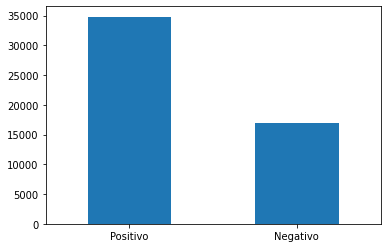

In [12]:
count_classes = pd.value_counts(dataset['sentimiento'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ["Positivo","Negativo"])

### Seperacion de Dataset

- 100 Comentarios Positivos 
- 100 Comentarios Negativos 

In [805]:
datasetPositivos = dataset.loc[(dataset['sentimiento'] == 1)][:100]
datasetNegativos = dataset.loc[(dataset['sentimiento'] == 0)][:100]

### Generación de Resumen
- Para poder entrenar la red neuronal, se realizo el resumen por nosotros mismos del comentario

### Carga de Dataset Con Texto y Resumen en Español

In [13]:
dataset = pd.read_csv("Datasets/ComentariosConResumenCorto.csv", low_memory=False,  encoding= 'utf-8', sep=',')
dataset = dataset.drop(['Unnamed: 0'], axis=1)
print(dataset.shape)
dataset.head(10)

(200, 4)


,Text,sentimiento,ResumenLargo,Summary
0,"Ruido infernal, poca luz y muy rica comida. De...",1,La relación precio-calidad es muy buena. Es pa...,precio-calidad es muy buena
1,"Muy buen ambiente, buena música. La atención e...",1,"Muy buen ambiente, buena música. Las pizzas so...","buen ambiente, buena música"
2,"¡Tan bueno como siempre! Después de 15 años, v...",1,"¡Tan bueno como siempre! Después de 15 años, v...",¡Tan bueno como siempre!
3,Me encanta este lugar. Pizza muy finita y riqu...,1,Pizza muy finita y riquisima. La atención muy ...,me encanta
4,Un clásico! Soy habitué desde los 90,1,Un clásico! Soy habitué desde los 90,me encanta
5,Simplemente genial! Histórico... voy desde que...,1,"Simplemente genial, deliciosas comidas italian...","genial, deliciosas"
6,este restaurant es LO MAS ...... desde su dueñ...,1,"restaurant inigualable , calido , educadisimo ...",restaurant inigualable
7,"Ambientaciòn excelente, atenciòn personal y mu...",1,"Ambientaciòn excelente, atenciòn personal y mu...",restaurant excelente
8,Muy buena atmosfera. Atencion agradable. La co...,1,Muy buena atmosfera. Atencion agradable. La co...,La comida de calidad
9,Excelente! Siguen siendo el referente de la co...,1,"Excelente, Buena música, lindas camareras , so...","Excelente, buena onda"


([<matplotlib.axis.XTick at 0x1973176e760>,
 [Text(0, 0, 'Positivo'), Text(1, 0, 'Negativo')])

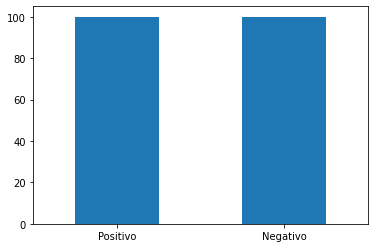

In [14]:
count_classes = pd.value_counts(dataset['sentimiento'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ["Positivo","Negativo"])

### Limpieza de Datos 

#### Verificación y Eliminación re filas con valores nulos 

- El dataset no cuenta con columnas vacias 

In [15]:
def eliminarValoresNulos(dataset):
    nan_rows = dataset[dataset.isnull().any(1)]
    dataset.columns[dataset.isnull().any()]
    dataset = dataset.dropna(how='any')
    return dataset
dataset = eliminarValoresNulos(dataset)

In [16]:
print(dataset.isnull().sum())
print("--- Existen valores nulos: ",dataset.isnull().values.any())
print(dataset.isnull().sum().sum())

Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
--- Existen valores nulos:  False
0


#### Verificación de caracteres especiales 

- No se encontro ningun caracter especial en el dataset

In [17]:
print("! \n",dataset.isin(['!']).sum())
print("@ \n",dataset.isin(['@']).sum())
print("# \n",dataset.isin(['#']).sum())
print("$ \n",dataset.isin(['$']).sum())
print("% \n",dataset.isin(['%']).sum())
print("^ \n",dataset.isin(['^']).sum())
print("& \n",dataset.isin(['&']).sum())
print("* \n",dataset.isin(['*']).sum())
print("~ \n",dataset.isin(['~']).sum())
print("| \n",dataset.isin(['|']).sum())
print("\' \n",dataset.isin(['\'']).sum())
print("` \n",dataset.isin(['`']).sum())

! 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
@ 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
# 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
$ 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
% 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
^ 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
& 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
* 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
~ 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
| 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
' 
 Text            0
sentimiento     0
ResumenLargo    0
Summary         0
dtype: int64
` 
 Text            0

#### Información sobre el dataset

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          200 non-null    object
 1   sentimiento   200 non-null    int64 
 2   ResumenLargo  200 non-null    object
 3   Summary       200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [19]:
dataset.describe()

,sentimiento
count,200.000000
mean,0.500000
std,0.501255
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


**Ahora aplicaremos algunos de los filtros de limpieza que se suelen usar para poder tratar el texto:**

- Pasar texto a minúsculas
- Quitar signos de puntuación (interrogación, etc.)
- Quitar espacios extra, tabulaciones
- Eliminar etiquetas HTML
- Elimine cualquier texto dentro del paréntesis ( )
- Eliminar puntuaciones y caracteres especiales
- Eliminar palabras vacías
- Eliminar palabras cortas

#### Limpiar texto y summary del dataset

In [20]:
def limpiarTexto(texto):
    newString = texto.lower() #texto en minisculas 
    newString = BeautifulSoup(newString, "html.parser").text # eliminacion de texto html
    newString = re.sub(r'\([^)]*\)', '', newString) #eliminacion de caracteres especiales
    newString = re.sub('"','', newString) #eliminacion de comillas dentro del texto
    newString = re.sub('[m]{2,}', 'mm', newString) 
    '''elimine el texto entre corchetes, elimine la puntuación y elimine las palabras que contienen números.'''
    newString = re.sub('\[.*?¿\]\%', ' ', newString)
    newString = re.sub('[%s]' % re.escape(string.punctuation), ' ', newString)
    newString = re.sub('\w*\d\w*', '', newString)
    '''Deshágase de algunos signos de puntuación adicionales y texto sin sentido que se perdió la primera vez.'''
    newString = re.sub('[‘’“”…«»]', '', newString)
    newString = re.sub('\n', ' ', newString)
    return newString

In [21]:
def limpiarDataset(dataset):
    ## Limpiamos el texto de la columna text 
    textoLimpio = []
    for t in dataset['Text']:
        newtextoLimpio = limpiarTexto(t)
        textoLimpio.append(newtextoLimpio) 
        
    ## Limpiamos el texto de la columna Summary 
    summarylimpio = []
    for t in dataset['Summary']:
        newSummaryLimpio = limpiarTexto(t)
        summarylimpio.append(newSummaryLimpio)
        
    dataset['cleaned_text']=textoLimpio
    dataset['cleaned_summary']=summarylimpio
    return dataset

In [22]:
datasetLimpio = limpiarDataset(dataset)
datasetLimpio.head(5)

C:\Users\Juan\anaconda3\envs\Tesis-Env\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,Text,sentimiento,ResumenLargo,Summary,cleaned_text,cleaned_summary
0,"Ruido infernal, poca luz y muy rica comida. De...",1,La relación precio-calidad es muy buena. Es pa...,precio-calidad es muy buena,ruido infernal poca luz y muy rica comida de...,precio calidad es muy buena
1,"Muy buen ambiente, buena música. La atención e...",1,"Muy buen ambiente, buena música. Las pizzas so...","buen ambiente, buena música",muy buen ambiente buena música la atención e...,buen ambiente buena música
2,"¡Tan bueno como siempre! Después de 15 años, v...",1,"¡Tan bueno como siempre! Después de 15 años, v...",¡Tan bueno como siempre!,¡tan bueno como siempre después de años vol...,¡tan bueno como siempre
3,Me encanta este lugar. Pizza muy finita y riqu...,1,Pizza muy finita y riquisima. La atención muy ...,me encanta,me encanta este lugar pizza muy finita y riqu...,me encanta
4,Un clásico! Soy habitué desde los 90,1,Un clásico! Soy habitué desde los 90,me encanta,un clásico soy habitué desde los,me encanta


In [9]:
datasetLimpio.to_csv("Datasets/DatasetLimpio.csv", sep=";",index = False) 

#### StopWords Español

In [23]:
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) 
print(stop_words)

{'a', 'fue', 'tienen', 'seamos', 'estarías', 'tendréis', 'habría', 'serían', 'habríais', 'me', 'cual', 'esos', 'estaríamos', 'estaréis', 'eran', 'tuvieras', 'otra', 'todo', 'estas', 'sí', 'siente', 'lo', 'hubieron', 'teniendo', 'algunas', 'estando', 'sentidos', 'hubiera', 'nuestra', 'algo', 'teníamos', 'estuviesen', 'habíamos', 'fuésemos', 'tú', 'estás', 'estáis', 'tenido', 'tuvieseis', 'estar', 'tendríamos', 'tuvieron', 'suyas', 'habéis', 'fuerais', 'fuéramos', 'tuviéramos', 'estuvieseis', 'estamos', 'he', 'fuisteis', 'tuviste', 'fueras', 'estuviste', 'seremos', 'poco', 'durante', 'nada', 'había', 'otros', 'habrá', 'del', 'tuvimos', 'ya', 'algunos', 'tuyas', 'seas', 'nos', 'tuvierais', 'ellas', 'estaremos', 'estuvieran', 'tuviera', 'se', 'mío', 'les', 'fui', 'quienes', 'la', 'estabas', 'fuese', 'nuestro', 'tenían', 'eras', 'estaríais', 'esto', 'habíais', 'este', 'estuvieses', 'porque', 'tengan', 'mí', 'antes', 'estuvimos', 'ese', 'un', 'míos', 'en', 'otro', 'hubiéramos', 'otras', 'est

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Top palabras sin realizar stopwords

In [21]:
!pip install plotly

In [22]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=1f1254da1d7017e2f78a27cbc9b7dc4ab8a73ec1969849d38610dfbf812026a9
  Stored in directory: c:\users\juan\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [24]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(datasetLimpio['cleaned_text'], 10)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['cleaned_text' , 'count'])
df1.groupby('cleaned_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Números de Apariciones', linecolor='black')


de 415
la 398
el 278
que 257
un 177
muy 173
no 173
con 158
es 152
en 138


#### Eliminación de StopWords 

In [27]:
def stopWords(textoLimpio, numero):
    if(numero==0):
        tokens = [w for w in textoLimpio.split() if not w in stop_words]
    else:
        tokens=textoLimpio.split()
    long_words=[]    
    for i in tokens:
        if len(i)>1:  #eliminacion de palabras cortas
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [28]:
def stopWords_dataset(datasetLimpio):
    ## Limpiamos el texto de la columna text 
    textoToken = []
    for t in datasetLimpio['cleaned_text']:
        newtextoToken = stopWords(t,0)
        textoToken.append(newtextoToken) 
        
    ## Limpiamos el texto de la columna Summary 
    summaryToken = []
    for t in datasetLimpio['cleaned_summary']:
        newSummaryToken = stopWords(t,1)
        summaryToken.append(newSummaryToken)
        
    datasetLimpio['token_text']=textoToken
    datasetLimpio['token_summary']=summaryToken
    return datasetLimpio

In [29]:
datasetLimpiosinstopwords = stopWords_dataset(datasetLimpio)
datasetLimpiosinstopwords.tail(5)

,Text,sentimiento,ResumenLargo,Summary,cleaned_text,cleaned_summary,token_text,token_summary
195,"La primera vez fuimos con mucha expectativa, p...",0,tuvimos que esperar mucho y nos asignaron una ...,sushi no estaba fresco,la primera vez fuimos con mucha expectativa p...,sushi no estaba fresco,primera vez mucha expectativa puesto pagina ha...,sushi no estaba fresco
196,Fuimos con un cupón de pez urbano para probar ...,0,"la verdad muy malo el combo que nos sirvieron,...",muy malo y ostentoso,fuimos con un cupón de pez urbano para probar ...,muy malo y ostentoso,cupón pez urbano probar sushi venía entrada ce...,muy malo ostentoso
197,"Fuimos maltratados en este lugar, fuimos con u...",0,"Fuimos maltratados en este lugar, no respetaro...",pesima atencion y groseros,fuimos maltratados en este lugar fuimos con u...,pesima atencion y groseros,maltratados lugar groupon respetaron reserva p...,pesima atencion groseros
198,"Fuimos con un cupón que incluía un ""ceviche"" d...",0,"El sushi, pésimo. Carta de vinos corta y cara....","El sushi, pésimo.",fuimos con un cupón que incluía un ceviche de ...,el sushi pésimo,cupón incluía ceviche entrada combinado sushi ...,el sushi pésimo
199,Ay. Paso a formar parte de la larga lista de l...,0,pesima atencion y groseros,pesima atencion y groseros,ay paso a formar parte de la larga lista de l...,pesima atencion y groseros,ay paso formar parte larga lista decepcionados...,pesima atencion groseros


In [30]:
datasetLimpiosinstopwords.head(5)

,Text,sentimiento,ResumenLargo,Summary,cleaned_text,cleaned_summary,token_text,token_summary
0,"Ruido infernal, poca luz y muy rica comida. De...",1,La relación precio-calidad es muy buena. Es pa...,precio-calidad es muy buena,ruido infernal poca luz y muy rica comida de...,precio calidad es muy buena,ruido infernal poca luz rica comida spritz ini...,precio calidad es muy buena
1,"Muy buen ambiente, buena música. La atención e...",1,"Muy buen ambiente, buena música. Las pizzas so...","buen ambiente, buena música",muy buen ambiente buena música la atención e...,buen ambiente buena música,buen ambiente buena música atención rápida piz...,buen ambiente buena música
2,"¡Tan bueno como siempre! Después de 15 años, v...",1,"¡Tan bueno como siempre! Después de 15 años, v...",¡Tan bueno como siempre!,¡tan bueno como siempre después de años vol...,¡tan bueno como siempre,¡tan bueno siempre después años volvimos filo ...,¡tan bueno como siempre
3,Me encanta este lugar. Pizza muy finita y riqu...,1,Pizza muy finita y riquisima. La atención muy ...,me encanta,me encanta este lugar pizza muy finita y riqu...,me encanta,encanta lugar pizza finita riquisima atención ...,me encanta
4,Un clásico! Soy habitué desde los 90,1,Un clásico! Soy habitué desde los 90,me encanta,un clásico soy habitué desde los,me encanta,clásico habitué,me encanta


In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(datasetLimpio['token_text'], 10)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['token_text' , 'count'])
df1.groupby('token_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Números de Apariciones', linecolor='black')

comida 81
lugar 76
excelente 56
atención 52
buena 51
bien 32
mas 31
servicio 30
calidad 29
pedimos 29


#### Almacenamiento de dataset limpio y sin stopwords

In [14]:
datasetLimpiosinstopwords.to_csv("Datasets/DatasetLimpioSinStopwords.csv", sep=";",index = False) 

### Distribución de Ngramas dentro del Dataset

#### Analisis de Bigrama

In [35]:
common_words = get_top_n_bigram(datasetLimpio['cleaned_summary'], 10)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['cleaned_summary' , 'count'])
df3.groupby('cleaned_summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Números de Apariciones', linecolor='black')

la comida 18
muy buena 7
comida es 7
es excelente 6
me gusto 6
me encanta 5
buena comida 5
comida muy 5
no me 5
precios altos 5


In [34]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(datasetLimpio['token_text'], 10)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['token_text' , 'count'])
df3.groupby('token_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Números de Apariciones', linecolor='black')


carta vinos 10
buenos aires 8
comida excelente 7
atención buena 7
precio calidad 6
buena comida 6
buen lugar 6
excelente atención 6
vale pena 6
relación precio 5


####  Analisis de Trigrama

In [36]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(datasetLimpio['token_text'], 10)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['token_text' , 'count'])
df3.groupby('token_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Números de Apariciones', linecolor='black')


relación precio calidad 5
buena comida excelente 2
varias veces siempre 2
precio calidad acorde 2
buena carta vinos 2
comida bien presentada 2
atención buena lugar 2
calidad atención esmerada 2
vuelvo aunque regalen 2
ruido infernal poca 1


#### Creamos nuestro “Bag of Words”

In [71]:
##Creamos nuestro vector, en donde contamos las palabras que aparecen en el dataset
##Eliminacion de stop words, minimo de frecuencia en 2 aparaciones por lo menos. 
cv = CountVectorizer(stop_words=stop_words,min_df=2, ngram_range=(1, 3))
data_cv = cv.fit_transform(datasetLimpiosinstopwords.token_text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
#data_dtm.index = list(datasetLimpiosinstopwords.year.unique())
data_dtm.shape
data_dtm

C:\Users\Juan\anaconda3\envs\Tesis-Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,abajo,abrieron,absoluto,abundante,abundantes,aceite,aceptable,achuras,aclarar,acompañamiento,...,vuelvo,vuelvo aunque,vuelvo aunque regalen,web,wok,yendo,zona,última,última vez,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
data_dtm[['pesima', 'malo', 'rico', 'calidad', 'buena', 'horrible', 'pollo']].sort_values(by='pollo', ascending=False).head(10)

,pesima,malo,rico,calidad,buena,horrible,pollo
187,0,0,0,0,0,0,1
177,0,1,0,0,0,0,1
95,0,0,0,0,0,0,1
142,0,0,0,0,0,0,1
181,0,0,1,0,1,0,1
137,0,0,0,0,0,1,1
135,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0


In [101]:
dataPlato = datasetLimpiosinstopwords[datasetLimpiosinstopwords['Text'].str.contains('pollo?', regex=True)]
dataPlato

,Text,sentimiento,ResumenLargo,Summary,cleaned_text,cleaned_summary,token_text,token_summary
95,"Fui con mi novia a cenar, nos recibieron muy b...",1,"Muy sabrosa la comida, bien presentada, la ate...",Muy sabrosa la comida,fui con mi novia a cenar nos recibieron muy b...,muy sabrosa la comida,novia cenar recibieron bien copas champagne ca...,muy sabrosa la comida
137,"Compramos 1 menú: Entrada, Plato Ppal, bebida ...",0,"Lugar deprimente, baja categoría, entrás y te ...",Lugar deprimente,compramos menú entrada plato ppal bebida y...,lugar deprimente,compramos menú entrada plato ppal bebida postr...,lugar deprimente
142,"Muy mala atención, la pechuga de pollo grasien...",0,"Muy mala atención, la pechuga de pollo grasien...",Muy mala atención,muy mala atención la pechuga de pollo grasien...,muy mala atención,mala atención pechuga pollo grasienta rosadita...,muy mala atención
159,Fui con mi hermana y dos sobrinas que no conoc...,0,"La picada resultó muy mala. Malo el queso, el ...",comida de baja calidad,fui con mi hermana y dos sobrinas que no conoc...,comida de baja calidad,hermana dos sobrinas conocían san telmo pedí e...,comida de baja calidad
177,"Muy malo, nada que ver con el de Puerto Madero...",0,"el lugar es pequeño, la comida vino fría, dev...",comida olvidable,muy malo nada que ver con el de puerto madero...,comida olvidable,malo ver puerto madero lugar pequeño comida vi...,comida olvidable
187,"Fui con un descuento, la comida consistía en d...",0,"carne super seca, recalentada y pasada de punt...","carne super seca, recalentada",fui con un descuento la comida consistía en d...,carne super seca recalentada,descuento comida consistía dos bebidas acompañ...,carne super seca recalentada


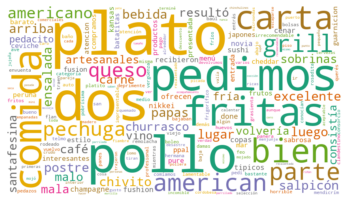

In [96]:
##Pasamos nuestra columna a texto
text = " ".join(review for review in dataPlato.token_text)
##Definicion 
wc = WordCloud(stopwords=stop_words,width=848, height=480, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wordcloud = wc.generate(text)
#wordcloud.to_file("images/nubePalabras.png")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

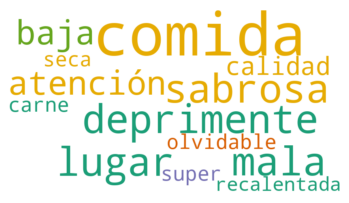

In [97]:
##Pasamos nuestra columna a texto
text = " ".join(review for review in dataPlato.token_summary)
##Definicion 
wc = WordCloud(stopwords=stop_words,width=848, height=480, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wordcloud = wc.generate(text)
#wordcloud.to_file("images/nubePalabras.png")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [17]:
data_dtm.to_pickle("BagsCountWords/vectorizacion.pkl")

In [3]:
datatTranspose = pd.read_pickle('BagsCountWords/vectorizacion.pkl')
datatTranspose = datatTranspose.transpose().sort_values(by=0, ascending=False)
datatTranspose.head(10)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
calidad,2,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
informal,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cocción,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
atento,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
justo,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rico,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
relación,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ricas,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rica,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
poca,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Nube de Palabras

##### Nube de palabras para texto completo 

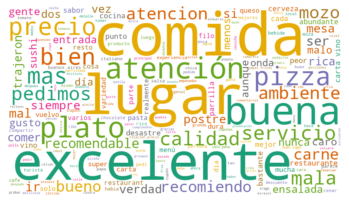

In [48]:
##Pasamos nuestra columna a texto
text = " ".join(review for review in datasetLimpiosinstopwords.token_text)
##Definicion 
wc = WordCloud(stopwords=stop_words,width=848, height=480, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wordcloud = wc.generate(text)
wordcloud.to_file("images/nubePalabras.png")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

##### Nube de palabras para resumen de texto

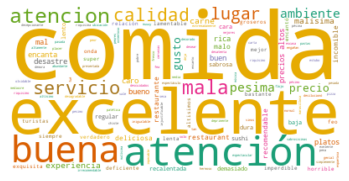

In [20]:
##Pasamos nuestra columna a texto
text = " ".join(review for review in datasetLimpiosinstopwords.token_summary)
##Definicion 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wordcloud = wc.generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Tratamiento inicial de Variables

#### Distribución de las secuencia de oraciones de texto y resumen

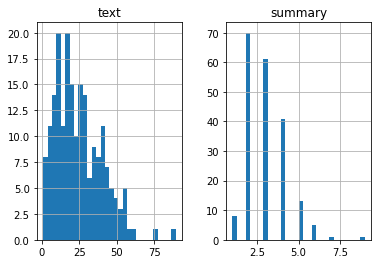

,text,summary
count,200.000000,200.000000
mean,24.690000,3.030000
std,15.509566,1.210963
min,1.000000,1.000000
25%,12.000000,2.000000
50%,22.000000,3.000000
75%,36.000000,4.000000
max,89.000000,9.000000


In [21]:
text_word_count = []
summary_word_count = []

# llenar las listas con la longitud de las oraciones
for i in datasetLimpiosinstopwords['token_text']:
      text_word_count.append(len(i.split()))

for i in datasetLimpiosinstopwords['token_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()
length_df.describe()

**Interesante**. Podemos fijar la longitud máxima del resumen en 7, ya que esa parece ser la longitud mayoritaria del resumen.

- Entendamos la proporción de la longitud de los resúmenes por debajo de 7

In [22]:
cnt=0
for i in datasetLimpiosinstopwords['token_summary']:
    if(len(i.split())<=7):
        cnt=cnt+1
print(cnt/len(datasetLimpiosinstopwords['token_summary']))

0.995


**Observación**: el 99% de los resúmenes tienen una longitud inferior a 18. Por lo tanto, podemos fijar la longitud máxima del resumen en 7.

Fijemos la longitud máxima del texto original en este caso 80 y subimos al valor proximo divisible para 7

In [40]:
max_text_len=80 ##Longitud maxima del resumen
max_summary_len=7

**Seleccionar**: Las reseñas y resúmenes cuya longitud sea inferior o igual a max_text_len y max_summary_len

In [41]:
token_text =np.array(dataset['token_text'])
token_summary=np.array(dataset['token_summary'])

short_text=[]
short_summary=[]

for i in range(len(token_text)):
    if(len(token_summary[i].split())<=max_summary_len and len(token_text[i].split())<=max_text_len):
        short_text.append(token_text[i])
        short_summary.append(token_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})
print("Size de dataset con maximos valores ", df.shape)
df.head(10)

Size de dataset con maximos valores  (198, 2)


,text,summary
0,ruido infernal poca luz rica comida spritz ini...,precio calidad es muy buena
1,buen ambiente buena música atención rápida piz...,buen ambiente buena música
2,¡tan bueno siempre después años volvimos filo ...,¡tan bueno como siempre
3,encanta lugar pizza finita riquisima atención ...,me encanta
4,clásico habitué,me encanta
5,simplemente genial histórico voy adolescente t...,genial deliciosas
6,restaurant mas dueño tano inigualable calido e...,restaurant inigualable
7,ambientaciòn excelente atenciòn personal buena...,restaurant excelente
8,buena atmosfera atencion agradable comida cali...,la comida de calidad
9,excelente siguen siendo referente cocina itali...,excelente buena onda


**Agregar**: Tokens especiales START y END al principio y al final del resumen.

Nota: asegúrese de que las tokens especiales nunca aparezcan en el resumen que se obtiene 

In [42]:
df['summary'] = df['summary'].apply(lambda x : 'startinicio '+ x + ' endfin')
df.head(5)

,text,summary
0,ruido infernal poca luz rica comida spritz ini...,startinicio precio calidad es muy buena endfin
1,buen ambiente buena música atención rápida piz...,startinicio buen ambiente buena música endfin
2,¡tan bueno siempre después años volvimos filo ...,startinicio ¡tan bueno como siempre endfin
3,encanta lugar pizza finita riquisima atención ...,startinicio me encanta endfin
4,clásico habitué,startinicio me encanta endfin


In [55]:
df.to_csv("Datasets/DatasetProcesado.csv", sep=";",index = False) 

### Transformaciones

Creación de pipeline para obtenencio de texto preprocesado

1. Creacion de Clase en python para luego utilizar en Pipeline

In [43]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
import string

def eliminarValoresNulos(dataset):
    nan_rows = dataset[dataset.isnull().any(1)]
    dataset.columns[dataset.isnull().any()]
    dataset = dataset.dropna(how='any')
    return dataset

def limpiarTexto(texto):
    newString = texto.lower() #texto en minisculas 
    newString = BeautifulSoup(newString, "html.parser").text # eliminacion de texto html
    newString = re.sub(r'\([^)]*\)', '', newString) #eliminacion de caracteres especiales
    newString = re.sub('"','', newString) #eliminacion de comillas dentro del texto
    newString = re.sub('[m]{2,}', 'mm', newString) 
    '''elimine el texto entre corchetes, elimine la puntuación y elimine las palabras que contienen números.'''
    newString = re.sub('\[.*?¿\]\%', ' ', newString)
    newString = re.sub('[%s]' % re.escape(string.punctuation), ' ', newString)
    newString = re.sub('\w*\d\w*', '', newString)
    '''Deshágase de algunos signos de puntuación adicionales y texto sin sentido que se perdió la primera vez.'''
    newString = re.sub('[‘’“”…«»]', '', newString)
    newString = re.sub('\n', ' ', newString)
    return newString

def limpiarDataset(dataset):
    ## Limpiamos el texto de la columna text 
    textoLimpio = []
    for t in dataset['Text']:
        newtextoLimpio = limpiarTexto(t)
        textoLimpio.append(newtextoLimpio) 
        
    ## Limpiamos el texto de la columna Summary 
    summarylimpio = []
    for t in dataset['Summary']:
        newSummaryLimpio = limpiarTexto(t)
        summarylimpio.append(newSummaryLimpio)
        
    dataset['cleaned_text']=textoLimpio
    dataset['cleaned_summary']=summarylimpio
    return dataset

def limpiarNewSample(dataset):
    ## Limpiamos el texto de la columna text 
    textoLimpio = []
    for t in dataset['Text']:
        newtextoLimpio = limpiarTexto(t)
        textoLimpio.append(newtextoLimpio) 
    dataset['cleaned_text']=textoLimpio
    return dataset

In [44]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) 

def stopWords(textoLimpio, numero):
    if(numero==0):
        tokens = [w for w in textoLimpio.split() if not w in stop_words]
    else:
        tokens=textoLimpio.split()
    long_words=[]    
    for i in tokens:
        if len(i)>1:  #eliminacion de palabras cortas
            long_words.append(i)   
    return (" ".join(long_words)).strip()

def stopWords_dataset(datasetLimpio):
    ## Limpiamos el texto de la columna text 
    textoToken = []
    for t in datasetLimpio['cleaned_text']:
        newtextoToken = stopWords(t,0)
        textoToken.append(newtextoToken) 
        
    ## Limpiamos el texto de la columna Summary 
    summaryToken = []
    for t in datasetLimpio['cleaned_summary']:
        newSummaryToken = stopWords(t,1)
        summaryToken.append(newSummaryToken)
        
    datasetLimpio['token_text']=textoToken
    datasetLimpio['token_summary']=summaryToken
    return datasetLimpio

def stopWords_newSample(datasetLimpio):
    ## Limpiamos el texto de la columna text 
    textoToken = []
    for t in datasetLimpio['cleaned_text']:
        newtextoToken = stopWords(t,0)
        textoToken.append(newtextoToken) 
        
    datasetLimpio['token_text']=textoToken
    return datasetLimpio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
 ##Longitud maxima del resumen y texto
def sizeMaximoParaTextoDataset(dataset, max_text_len=80, max_summary_len=7):    
    token_text =np.array(dataset['token_text'])
    token_summary=np.array(dataset['token_summary'])

    short_text=[]
    short_summary=[]

    for i in range(len(token_text)):
        if(len(token_summary[i].split())<=max_summary_len and len(token_text[i].split())<=max_text_len):
            short_text.append(token_text[i])
            short_summary.append(token_summary[i])

    df=pd.DataFrame({'text':short_text,'summary':short_summary})
    return df

 ##Longitud maxima del resumen y texto
def sizeMaximoParaTextoNewSample(dataset, max_text_len=100):    
    token_text =np.array(dataset['token_text'])
    short_text=[]
    for i in range(len(token_text)):
        if(len(token_text[i].split())<=max_text_len):
            short_text.append(token_text[i])
    df=pd.DataFrame({'text':short_text})
    return df

In [46]:
def etiquetasParaTokenizacionDataset(df):
    df['summary'] = df['summary'].apply(lambda x : 'startinicio '+ x + ' endfin')
    return df

def etiquetasParaTokenizacionNewSample(df):
    df['text'] = df['text'].apply(lambda x : 'startinicio '+ x + ' endfin')
    return df

def TextoToDataframe(texto):
    listadoTexto = [text]
    datasetPredict = pd.DataFrame()
    datasetPredict['Text'] = listadoTexto
    return datasetPredict

### Modelo con funciones de Preprocesamiento

In [5]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) 


def eliminarValoresNulos(dataset):
    nan_rows = dataset[dataset.isnull().any(1)]
    dataset.columns[dataset.isnull().any()]
    dataset = dataset.dropna(how='any')
    return dataset

def limpiarTexto(texto):
    newString = texto.lower() #texto en minisculas 
    newString = BeautifulSoup(newString, "html.parser").text # eliminacion de texto html
    newString = re.sub(r'\([^)]*\)', '', newString) #eliminacion de caracteres especiales
    newString = re.sub('"','', newString) #eliminacion de comillas dentro del texto
    newString = re.sub('[m]{2,}', 'mm', newString) 
    '''elimine el texto entre corchetes, elimine la puntuación y elimine las palabras que contienen números.'''
    newString = re.sub('\[.*?¿\]\%', ' ', newString)
    newString = re.sub('[%s]' % re.escape(string.punctuation), ' ', newString)
    newString = re.sub('\w*\d\w*', '', newString)
    '''Deshágase de algunos signos de puntuación adicionales y texto sin sentido que se perdió la primera vez.'''
    newString = re.sub('[‘’“”…«»]', '', newString)
    newString = re.sub('\n', ' ', newString)
    return newString

def limpiarNewSample(dataset):
    ## Limpiamos el texto de la columna text 
    textoLimpio = []
    for t in dataset['Text']:
        newtextoLimpio = limpiarTexto(t)
        textoLimpio.append(newtextoLimpio) 
    dataset['cleaned_text']=textoLimpio
    return dataset

def TextoToDataframe(texto):
    listadoTexto = [texto]
    datasetPredict = pd.DataFrame()
    datasetPredict['Text'] = listadoTexto
    return datasetPredict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from Transformador import preprocesamientoTexto
##Comencemos creando un DummyEstimator, del cual heredaremos init, fit y transform. 
##DummyEstimator es una clase útil que nos evita escribir código redundante.

class DummyTransformer(BaseEstimator, TransformerMixin):
    """
      Dummy class that allows us to modify only the methods that interest us,
      avoiding redudancy.
    """
    def __init__(self):
        return None

    def fit(self, X=None, y=None):
        return self

    def transform(self, X=None):
        return self

class Preprocesamiento(DummyTransformer):
    
    def transform(self, X=None):
        dataset = preprocesamientoTexto.TextoToDataframe(X)
        dataset = preprocesamientoTexto.eliminarValoresNulos(dataset)
        dataset = preprocesamientoTexto.limpiarNewSample(dataset)
        return dataset

if __name__=='__main__':
       print("Transformador cargado y listo...")

Transformador cargado y listo...


In [7]:
preprocesamiento_pipeline = Pipeline(steps=[ 
    ('texto_preprocesado', Preprocesamiento()), #    
])
preprocesamiento_pipeline

Pipeline(steps=[('texto_preprocesado', Preprocesamiento())])

In [8]:
text = 'Ay. Paso a formar parte de la larga lista de los decepcionados. Fui también con una promo. Supongo que fue eso lo que me puso un cartel de "adoro el Kani-Kama" porque tanto el "ceviche" (nótense las comillas) de la entrada como el sushi lo tenían como ingrediente principal. Recomendación: Para comer ceviche, vayan a un buen restaurant peruano, y para comer sushi, a un buen ponja. Menos glamour y más respeto por el comensal'
preprocesamiento_pipeline.fit_transform(text)


,Text,cleaned_text
0,Ay. Paso a formar parte de la larga lista de l...,ay paso a formar parte de la larga lista de l...


### Cargar y Guardar Pipeline

In [2]:
# Funciones para guardar y cargar un Pipeline
import pickle

def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)


def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

#### Guardar pickle Pipeline

In [10]:
guardarPipeline(preprocesamiento_pipeline,'Transformador/pipePreprocesador')#2 pasos

#### Cargar pickle Pipeline

In [3]:
from Transformador.transformadorPreprocesamiento import Preprocesamiento
text = 'Ay. Paso a formar parte de la larga lista de los decepcionados. Fui también con una promo. Supongo que fue eso lo que me puso un cartel de "adoro el Kani-Kama" porque tanto el "ceviche" (nótense las comillas) de la entrada como el sushi lo tenían como ingrediente principal. Recomendación: Para comer ceviche, vayan a un buen restaurant peruano, y para comer sushi, a un buen ponja. Menos glamour y más respeto por el comensal'
pipe=cargarPipeline('Transformador/pipePreprocesador')
print(pipe)
pipe.transform(text)

Pipeline(steps=[('texto_preprocesado', Preprocesamiento())])


,Text,cleaned_text
0,Ay. Paso a formar parte de la larga lista de l...,ay paso a formar parte de la larga lista de l...


### Output: 

1. Csv dataset procesado 
2. Pickle transformador 

#### Csv dataset procesado 

- El archivo de dataset procesado se encuentra en el siguiente Path: Datasets/DatasetLimpioSinStopwords.csv

####  Pickle transformador 

Cargar archivos de Pickle

- El archivo de transformador se encuentra en el siguiente Path: Transformador/pipePreprocesadores.pickle

Cargar archivos de Python

- Clase: Preprocesamiento
- Cargar funciones para NLP

### Referencias

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/

https://efecode.com/preparacion-de-datos-transformacion-de-variables-categoricas-a-numericas-y-transformaciones-numericas

https://blog.paperspace.com/generating-text-summaries-gpt-2/

https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Counting%20words%20with%20scikit-learn's%20CountVectorizer.ipynb#scrollTo=QEQtqrUTVoOA

https://www.educative.io/edpresso/countvectorizer-in-python

https://towardsdatascience.com/customizing-sklearn-pipelines-transformermixin-a54341d8d624

https://towardsdatascience.com/nlp-python-pipeline-tutorial-for-text-classification-modeling-6eb1000f909c

https://towardsdatascience.com/how-to-build-a-custom-estimator-for-scikit-learn-fddc0cb9e16e

https://www.toptal.com/machine-learning/nlp-tutorial-text-classification

https://towardsdatascience.com/setting-up-a-text-summarisation-project-daae41a1aaa3

https://medium.com/datos-y-ciencia/pipeline-python-20c84e255444

https://www.datasource.ai/uploads/95e92d244d76c691837d30957d93b1f4.html

https://towardsdatascience.com/my-first-nlp-pipeline-99d24aafb773